In [1]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

df = pd.read_csv('./data_without_extra_features/lemmatized_and_misspelled_removed_SEFACED.csv', encoding='utf-8')

corpus = df['lemmatized_tokens']
y = df['Class_Label']

tokenized_corpus = [word_tokenize(text) for text in corpus]
# Word2Vec modelini eğitin
word2vec_model = Word2Vec(tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)

# Belge gömülerini ortalama kelime vektörlerini kullanarak oluşturan bir fonksiyon
def document_embedding(tokens):
    vectors = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)

# Belge gömülerini oluşturun
X_word2vec = np.array([document_embedding(tokens) for tokens in tokenized_corpus])



In [2]:
dfword2vec = pd.DataFrame(X_word2vec)

dfword2vec.to_csv("word2Vec.csv")


In [6]:
dfword2vec

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.157768,-0.065860,0.343640,-0.265568,0.477227,-0.318039,-0.152857,-0.099223,0.368261,0.492974,...,0.006308,-0.066085,0.388908,-1.006900,0.501644,0.390685,0.570393,-0.707416,-0.220276,0.239769
1,0.088189,-0.409102,0.347481,-0.364646,0.306400,-0.189350,0.047296,-0.407020,0.455640,0.626081,...,0.000959,0.166121,0.578976,-1.284538,0.733875,0.342128,0.366141,-0.612580,-0.284913,0.157639
2,0.218853,-0.521697,0.479957,-0.633412,0.342095,0.308763,0.066335,-0.597140,0.266638,0.405651,...,0.153235,0.202369,0.606024,-0.981745,0.411887,-0.030401,0.351359,-0.598865,-0.121738,0.475812
3,-0.083649,-0.075297,0.277940,-0.353500,0.345950,-0.180603,-0.140578,-0.092549,0.363561,0.585290,...,-0.007501,-0.063043,0.497554,-1.007820,0.530326,0.255336,0.516811,-0.631262,-0.043866,0.171623
4,0.045264,-0.011369,0.374032,-0.160235,0.251871,-0.050980,-0.178872,-0.129601,0.325692,0.575959,...,0.100681,-0.093855,0.567041,-1.090797,0.479877,0.344388,0.623268,-0.587049,-0.139739,0.047266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17110,-0.150192,-0.063589,0.370658,-0.321908,0.128342,0.129426,-0.078102,-0.291682,0.252490,0.504784,...,0.230161,-0.077187,0.675936,-1.343096,0.619625,0.394158,0.436827,-0.711496,0.291838,-0.006811
17111,-0.079919,0.049156,0.318327,-0.255410,0.361190,-0.148928,-0.178110,-0.078239,0.411694,0.448561,...,0.051498,-0.082727,0.350416,-1.010819,0.471405,0.421682,0.712965,-0.656740,-0.011241,0.210143
17112,-0.010874,-0.058221,0.349917,-0.263879,0.290070,-0.026969,-0.054540,-0.266040,0.288875,0.351012,...,0.022843,-0.064610,0.387031,-0.943139,0.314798,0.148867,0.426704,-0.673094,-0.030480,0.133197
17113,-0.236557,-0.065389,0.239410,-0.364419,0.363209,-0.262390,-0.062510,-0.140202,0.337526,0.513749,...,0.098851,-0.023975,0.598424,-1.012195,0.499597,0.434469,0.732228,-0.812538,0.052176,0.189635


In [3]:

# Veri kümesini eğitim ve test setlerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X_word2vec, y, test_size=0.2, random_state=42)


Logistic Regression Classifier:
Accuracy: 0.9506281040023371
Precision: 0.9594977723774808
Recall: 0.9716981132075472
F1-score: 0.9655594049317302


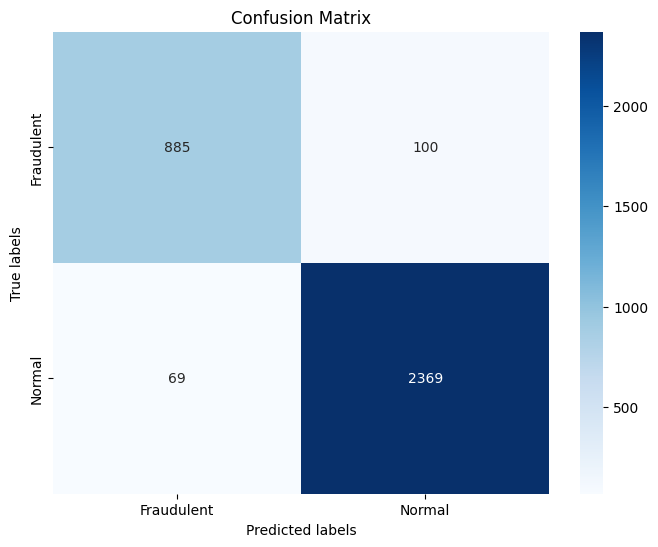

In [4]:

# LR

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score

lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)


# Test seti üzerinde tahminler yapın
lr_predictions = lr_model.predict(X_test)

# Modeli değerlendirin

lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions, pos_label='Normal')
lr_recall = recall_score(y_test, lr_predictions, pos_label='Normal')
lr_f1_score = f1_score(y_test, lr_predictions, pos_label='Normal')

print("Logistic Regression Classifier:")
print(f"Accuracy: {lr_accuracy}")
print(f"Precision: {lr_precision}")
print(f"Recall: {lr_recall}")
print(f"F1-score: {lr_f1_score}")
# print("Sınıflandırma Raporu:")
# print(classification_report(y_test, lr_predictions))

# Compute confusion matrix
cm = confusion_matrix(y_test, lr_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=lr_model.classes_, yticklabels=lr_model.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Random Forest Classifier:
Accuracy: 0.983640081799591
Precision: 0.9810177705977383
Recall: 0.9963084495488105
Fe-score: 0.9886039886039886


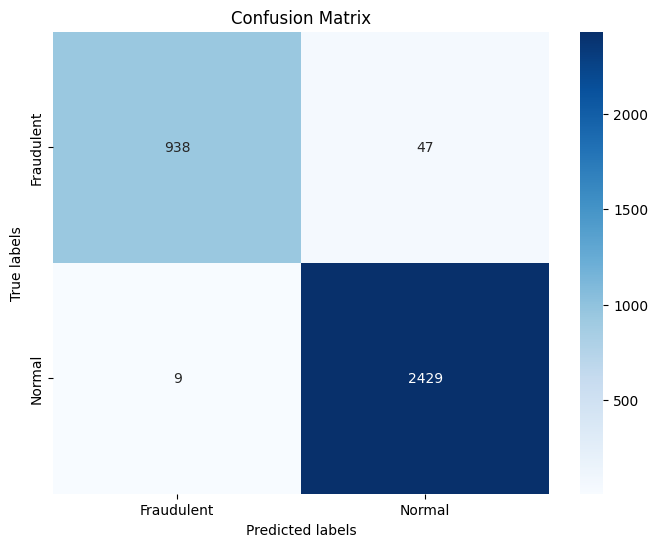

In [7]:
#RF

from sklearn.ensemble import RandomForestClassifier

# Rastgele Orman modelini başlatın
rf_model = RandomForestClassifier()

# Rastgele Orman modelini eğitin
rf_model.fit(X_train, y_train)

# Test seti üzerinde tahminler yapın
rf_predictions = rf_model.predict(X_test)

# Modeli değerlendirin

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, pos_label='Normal')
rf_recall = recall_score(y_test, rf_predictions, pos_label='Normal')
rf_f1_score = f1_score(y_test, rf_predictions, pos_label='Normal')

print("Random Forest Classifier:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"Fe-score: {rf_f1_score}")

# print("Sınıflandırma Raporu:")
# print(classification_report(y_test, rf_predictions))

# Compute confusion matrix
cm = confusion_matrix(y_test, rf_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Naive Bayes Classifier:
Accuracy: 0.8796377446684195
Precision: 0.957542908762421
Recall: 0.8695652173913043
F1-score: 0.9114359415305245


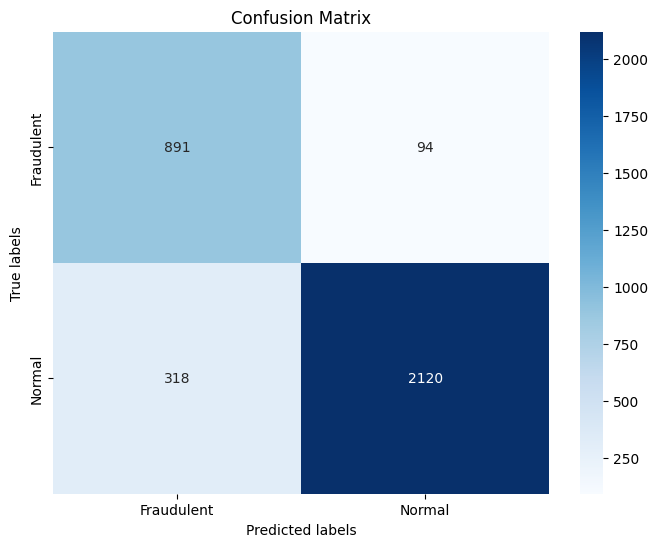

In [ ]:
#NB

from sklearn.naive_bayes import GaussianNB

# Çoklu Naive Bayes modelini başlatın
nb_model = GaussianNB()

# Çoklu Naive Bayes modelini eğitin
nb_model.fit(X_train, y_train)

# Test seti üzerinde tahminler yapın
nb_predictions = nb_model.predict(X_test)

# Modeli değerlendirin

nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions, pos_label='Normal')
nb_recall = recall_score(y_test, nb_predictions, pos_label='Normal')
nb_f1_score = f1_score(y_test, nb_predictions, pos_label='Normal')

print("Naive Bayes Classifier:")
print(f"Accuracy: {nb_accuracy}")
print(f"Precision: {nb_precision}")
print(f"Recall: {nb_recall}")
print(f"F1-score: {nb_f1_score}")
# print("Sınıflandırma Raporu:")
# print(classification_report(y_test, nb_predictions))


# Compute confusion matrix
cm = confusion_matrix(y_test, nb_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Support Vector Machine Classifier (LinearSVC):
Accuracy: 0.9547180835524394
Precision: 0.9623329283110571
Recall: 0.9745693191140279
F1-score: 0.9684124719788058


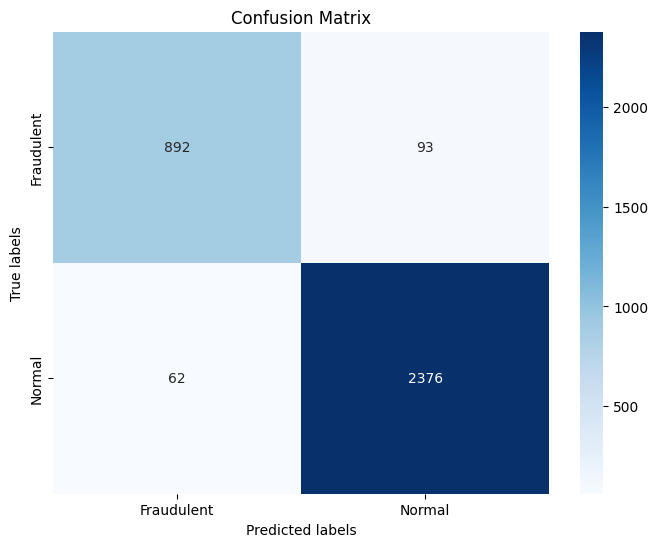

In [ ]:
#SVM
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.model_selection import train_test_split

svm_model = LinearSVC(max_iter=1000000, random_state=42)

svm_model.fit(X_train, y_train)

svm_predictions = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, pos_label='Normal')
svm_recall = recall_score(y_test, svm_predictions, pos_label='Normal')
svm_f1_score = f1_score(y_test, svm_predictions, pos_label='Normal')

print("Support Vector Machine Classifier (LinearSVC):")
print(f"Accuracy: {svm_accuracy}")
print(f"Precision: {svm_precision}")
print(f"Recall: {svm_recall}")
print(f"F1-score: {svm_f1_score}")
# print("Classification Report:")
# print(classification_report(y_test, svm_predictions))

# Compute confusion matrix
cm = confusion_matrix(y_test, svm_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# LSTM

import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score,confusion_matrix

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

df = pd.read_csv("./word2Vec.csv")
x = df.values

y_ = pd.read_csv("./labels.csv")
print(x.shape)
print(y_.shape)

print(y_["Class_Label"].iloc[2])

y = []
i = 0
while i < 17115 :
        if y_["Class_Label"].iloc[i] == "Normal":
                y.append(0)
        else:
                y.append(1)
        i += 1

y = np.array(y)
y_ = y.reshape(-1, 1)



# One Hot encode the class labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)

# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20, random_state=42)

# Build the model

model = Sequential()

model.add(Dense(10, input_shape=(101,), activation='relu', name='fc1'))
model.add(Dense(10, activation='relu', name='fc2'))
model.add(Dense(2, activation='softmax', name='output'))

# Adam optimizer with learning rate of 0.001
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print('Neural Network Model Summary: ')
print(model.summary())

# Train the model
model.fit(train_x, train_y, verbose=2, batch_size=5, epochs=200)


lstm_predictions = model.predict(test_x)






(17115, 101)
(17115, 1)
Normal


C:\Users\orange\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Neural Network Model Summary: 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 10)                1020      
                                                                 
 fc2 (Dense)                 (None, 10)                110       
                                                                 
 output (Dense)              (None, 2)                 22        
                                                                 
Total params: 1,152
Trainable params: 1,152
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
2739/2739 - 10s - loss: 4.7432 - accuracy: 0.7703 - 10s/epoch - 4ms/step
Epoch 2/200
2739/2739 - 8s - loss: 2.7100 - accuracy: 0.8553 - 8s/epoch - 3ms/step
Epoch 3/200
2739/2739 - 8s - loss: 2.0589 - accuracy: 0.8892 - 8s/epoch - 3ms/step
Epoch 4/200
2739/2739 - 8s - lo

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

Accuracy: 0.9707858603564125
Precision: 1.0
Recall: 0.8984771573604061
F1-score: 0.946524064171123


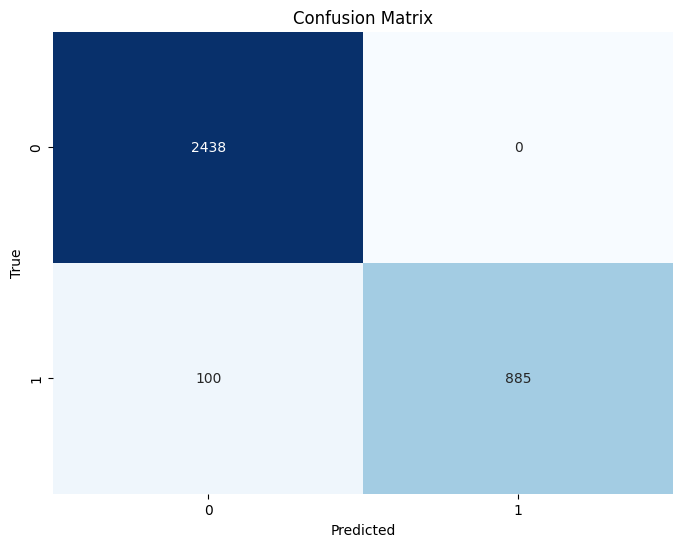

In [ ]:

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(lstm_predictions, axis=1)
test_y_classes = np.argmax(test_y, axis=1)

lstm_accuracy = accuracy_score(test_y_classes, y_pred_classes )
lstm_precision = precision_score(test_y_classes, y_pred_classes )
lstm_recall = recall_score(test_y_classes, y_pred_classes )
lstm_f1_score = f1_score(test_y_classes, y_pred_classes )



print(f"Accuracy: {lstm_accuracy}")
print(f"Precision: {lstm_precision}")
print(f"Recall: {lstm_recall}")
print(f"F1-score: {lstm_f1_score}")

# Compute confusion matrix
cm = confusion_matrix(test_y_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

C:\Users\orange\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Neural Network Model Summary: 
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 99, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 49, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 47, 32)            6176      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 23, 32)           0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 736)               0         
                                                                 
 dense (Dense)         

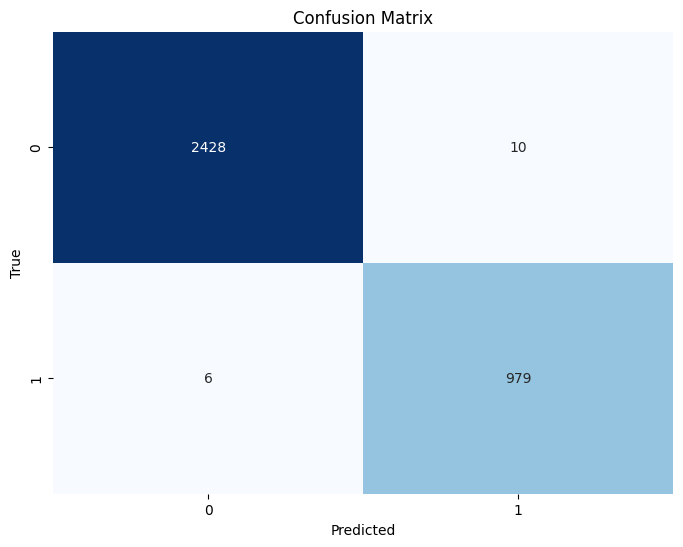

In [ ]:
# CNN

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.optimizers import Adam

df = pd.read_csv("./word2Vec.csv")
x = df.values

y_ = pd.read_csv("./labels.csv")

y = []
for label in y_["Class_Label"]:
    if label == "Normal":
        y.append(0)
    else:
        y.append(1)

y = np.array(y)
y_ = y.reshape(-1, 1)

# One Hot encode the class labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)

# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20, random_state=42)

# Reshape input data for CNN (samples, features, channels)
train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], 1)
test_x = test_x.reshape(test_x.shape[0], test_x.shape[1], 1)

# Build the CNN model
model = Sequential()

model.add(Conv1D(64, 3, activation='relu', input_shape=(101, 1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(32, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Adam optimizer with learning rate of 0.001
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print('Neural Network Model Summary: ')
print(model.summary())

# Train the model
model.fit(train_x, train_y, verbose=2, batch_size=32, epochs=10)

# Evaluate the model
cnn_predictions = model.predict(test_x)

y_pred_classes = np.argmax(cnn_predictions, axis=1)
test_y_classes = np.argmax(test_y, axis=1)

cnn_accuracy = accuracy_score(test_y_classes, y_pred_classes )
cnn_precision = precision_score(test_y_classes, y_pred_classes )
cnn_recall = recall_score(test_y_classes, y_pred_classes )
cnn_f1_score = f1_score(test_y_classes, y_pred_classes )



print(f"Accuracy: {cnn_accuracy}")
print(f"Precision: {cnn_precision}")
print(f"Recall: {cnn_recall}")
print(f"F1-score: {cnn_f1_score}")

# Compute confusion matrix
cm = confusion_matrix(test_y_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()